In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [44]:
# Load the data
data = pd.read_csv('dataset.csv')

In [45]:
# Exploratory Data Analysis
print(data.head())
print(data.info())
print(data.describe())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [46]:
# Check for missing values
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


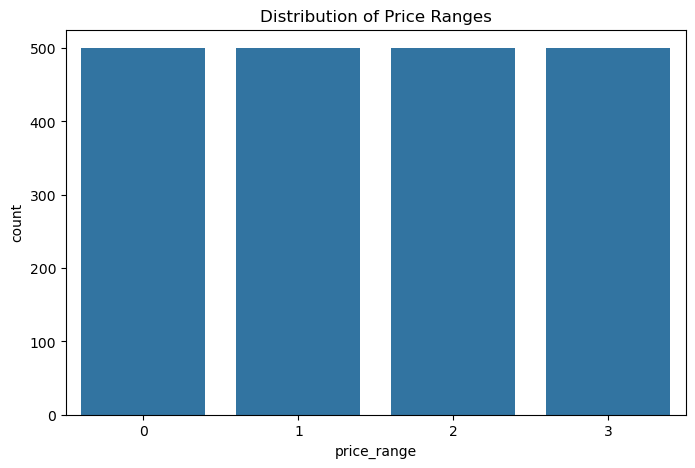

In [47]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=data)
plt.title('Distribution of Price Ranges')
plt.show()

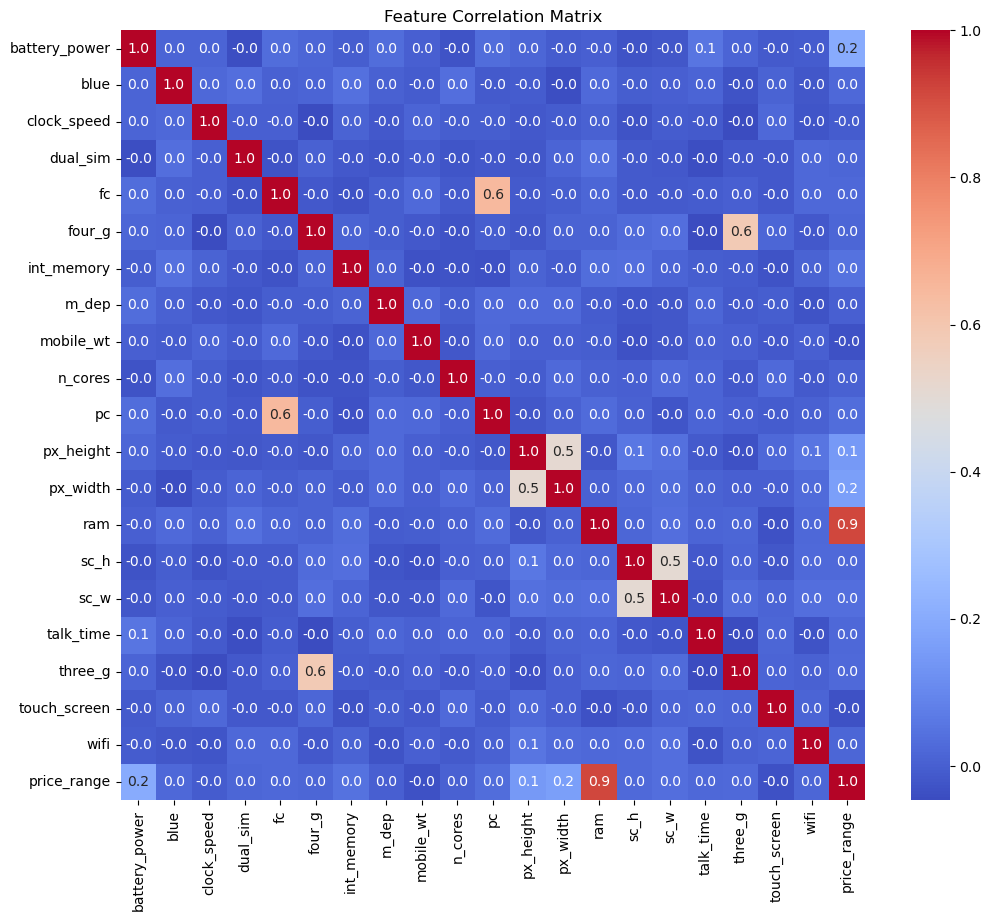

In [48]:
# Feature correlation analysis
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [49]:
# Prepare data for modeling
X = data.drop('price_range', axis=1)
y = data['price_range']

In [50]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Evaluate
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High', 'Very High'])

In [54]:
# Print results
print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Model Evaluation Results:
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         Low       0.95      0.96      0.96       105
      Medium       0.89      0.87      0.88        91
        High       0.78      0.87      0.82        92
   Very High       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [55]:
# Function to predict price range for new phone
def predict_price_range(phone_features):
    """Predict price range (0-3) for new phone features"""
    # Convert input to dataframe
    phone_df = pd.DataFrame([phone_features])
    
    # Scale features
    phone_scaled = scaler.transform(phone_df)
    
    # Predict
    prediction = rf_model.predict(phone_scaled)
    probability = rf_model.predict_proba(phone_scaled)
    
    # Map prediction to price range label
    price_labels = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}
    predicted_label = price_labels[prediction[0]]
    
    return predicted_label, probability[0]


In [56]:
# Feature importance
print("\nTop 5 Important Features:")
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False).head(5))


Top 5 Important Features:
ram              0.470962
battery_power    0.074796
px_height        0.058538
px_width         0.056722
mobile_wt        0.041434
dtype: float64


In [57]:
predicted_range, probabilities = predict_price_range(example_phone)
print(f"\nPredicted Price Range: {predicted_range}")
print("Class Probabilities:", probabilities)


Predicted Price Range: Very High
Class Probabilities: [0.01 0.01 0.08 0.9 ]
